## <center>Keras Syntax Basics</center>

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

### The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Deep Learning/Data Sets/TensorFlow/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


#### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

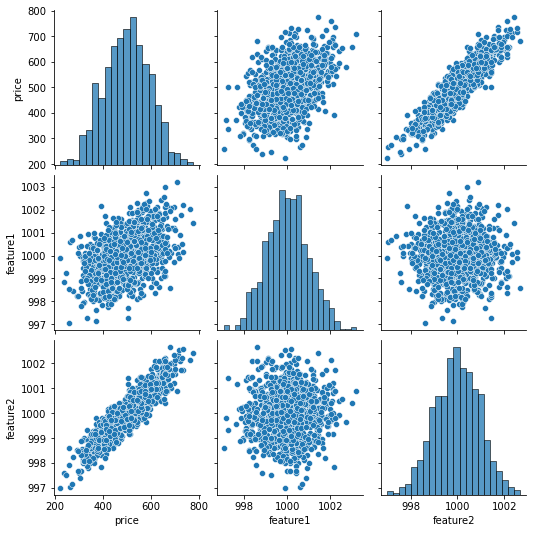

In [4]:
sns.pairplot(df);

#### Processing the data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Convert Pandas to Numpy for Keras --> using the .values

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
X_test = scaler.transform(X_test)

### TensorFlow 2.0 Syntax

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [10]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

#### Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

In [11]:
# 1. Model - as a list of layers

model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

# 2. Model - adding in layers one by one

model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))


# Adding layers one by one is an easier approach, mainly to the fact the lines of code can be erased or added with ease.

Let's go ahead and build a simple model and then compile it by defining our solver

In [12]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [13]:
model.compile(optimizer='rmsprop',loss='mse')

#### Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [14]:
model.fit(X_train,y_train,
          validation_data=(X_test, y_test),
          epochs=250, verbose=1)

Epoch 1/250
22/22 [==============================] - 2s 20ms/step - loss: 256720.9844 - val_loss: 259137.6250
Epoch 2/250
22/22 [==============================] - 0s 6ms/step - loss: 256690.1562 - val_loss: 259114.7656
Epoch 3/250
22/22 [==============================] - 0s 6ms/step - loss: 256667.7969 - val_loss: 259092.6406
Epoch 4/250
22/22 [==============================] - 0s 6ms/step - loss: 256645.7656 - val_loss: 259070.5938
Epoch 5/250
22/22 [==============================] - 0s 7ms/step - loss: 256623.8125 - val_loss: 259048.5938
Epoch 6/250
22/22 [==============================] - 0s 8ms/step - loss: 256601.8750 - val_loss: 259026.5000
Epoch 7/250
22/22 [==============================] - 0s 8ms/step - loss: 256580.0469 - val_loss: 259004.6719
Epoch 8/250
22/22 [==============================] - 0s 9ms/step - loss: 256558.1562 - val_loss: 258982.6094
Epoch 9/250
22/22 [==============================] - 0s 8ms/step - loss: 256536.2031 - val_loss: 258960.6094
Epoch 10/250
22/22

In [15]:
model.get_weights()

[array([[ 0.6436258 , -0.5717931 , -0.6634371 ,  0.4971058 ],
        [ 0.7796487 , -0.10202146, -0.7482805 , -0.895062  ]],
       dtype=float32),
 array([-0.01046748,  0.        ,  0.        , -0.0529903 ], dtype=float32),
 array([[ 0.5203557 ,  0.6628478 ,  0.16701378,  0.8210064 ],
        [-0.438812  , -0.8478133 , -0.726209  ,  0.19164759],
        [ 0.8113738 ,  0.7544287 ,  0.11420691, -0.7290784 ],
        [ 0.73175955, -0.12039479,  0.01565201, -0.00359621]],
       dtype=float32),
 array([-0.03021106,  0.03204808, -0.03030395,  0.03118453], dtype=float32),
 array([[-0.49448344, -0.6559615 ,  0.437851  ,  0.4378776 ],
        [ 0.38158005, -0.6522074 , -0.81763285, -0.12843047],
        [ 0.8472776 , -0.34553725, -0.18078345,  0.48628196],
        [-0.2918259 ,  0.12257665, -0.32208234, -0.3013264 ]],
       dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.03060571], dtype=float32),
 array([[-0.82797664],
        [-1.0923448 ],
        [-0.7800636 ],
        

In this case, the weights obtained don't make a lot of sense. Opposite to a simple ML model, NN tendo to be more accurate but less interpretable, and the more they grow the bigger the difficulty to understand them. 

#### Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [16]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,256720.984375,259137.625000
1,256690.156250,259114.765625
2,256667.796875,259092.640625
3,256645.765625,259070.593750
4,256623.812500,259048.593750


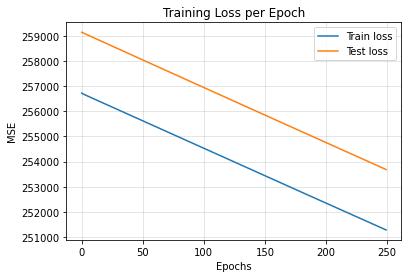

In [17]:
plt.plot(range(len(loss)), loss["loss"], label="Train loss")
plt.plot(range(len(loss)), loss["val_loss"], label="Test loss")

plt.title("Training Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.grid(alpha=0.4);

#### Compare final evaluation (MSE) on training set and test set.

In [18]:
model.metrics_names

['loss']

In [19]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [20]:
training_score

251278.015625

In [21]:
test_score

253688.046875

#### Predictions

In [22]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df["Predicted Y"] = model.predict(X_test, verbose=0)
pred_df

,Test Y,Predicted Y
0,402.296319,5.505636
1,624.156198,5.505636
2,582.455066,5.505636
3,578.588606,5.505636
4,371.224104,5.505636
...,...,...
295,525.704657,5.505636
296,502.909473,5.505636
297,612.727910,5.505636
298,417.569725,5.505636


<AxesSubplot:xlabel='Test Y', ylabel='Predicted Y'>

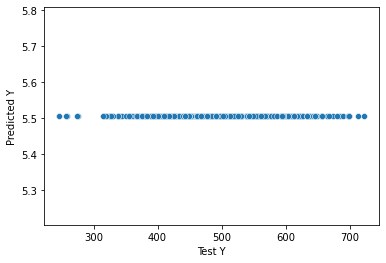

In [23]:
sns.scatterplot(x='Test Y',y='Predicted Y',data=pred_df)

In [24]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Predicted Y']

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

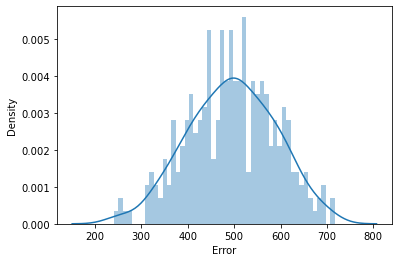

In [25]:
sns.distplot(pred_df['Error'],bins=50)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
MAE = mean_absolute_error(pred_df['Test Y'],pred_df['Predicted Y'])
RMSE = (mean_squared_error(pred_df['Test Y'],pred_df['Predicted Y']))**0.5

In [28]:
MAE

494.8697037367103

In [29]:
RMSE

503.6745530021069

#### Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [30]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

# Don't forget to scale!
new_gem = scaler.transform(new_gem)

model.predict(new_gem, verbose=0)

array([[5.5056357]], dtype=float32)

#### Saving and Loading a Model

In [31]:
# from tensorflow.keras.models import load_model

# model.save('my_model.h5') --> creates a HDF5 file 'my_model.h5'
# later_model = load_model('my_model.h5')
# later_model.predict(new_gem)